In [41]:
#overview of libs i want to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
import time
from datetime import date
from sklearn.preprocessing import OneHotEncoder

#read data into dataframes
data_csv = pd.read_csv('measurements.csv')
data_xls = pd.read_excel('measurements2.xlsx')

In [2]:
data_csv.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [3]:
data_xls.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [4]:
# form the head of both files it looks like te same data. Lets check the bottom to be sure

In [5]:
data_csv.tail()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN
387,"14,7",5,25,25,30,AC,SP98,1,0,0,NaN,NaN


In [6]:
data_xls.tail()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN


In [7]:
data_xls.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [8]:
data_csv.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [9]:
# Looks like there is something different. So ill check data types

In [10]:
data_csv.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [11]:
data_xls.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [12]:
#ill go on with the data_xls file because it is formatted the right way.

#first i want to make all column names equal

data_xls.columns = data_xls.columns.map(lambda x : x.replace("-", "_").replace(" ", "_").lower())

#lets explore the data a little more.

In [13]:
data_xls.isna().sum()/len(data_xls)

distance         0.000000
consume          0.000000
speed            0.000000
temp_inside      0.030928
temp_outside     0.000000
specials         0.760309
gas_type         0.000000
ac               0.000000
rain             0.000000
sun              0.000000
refill_liters    0.966495
refill_gas       0.966495
dtype: float64

In [14]:
# there are 4 columns with NaN we need to check

# temp_inside
# temp_outside
# refill_liters
# refill_gas

In [15]:
#refill liters and refill gas looks like interesting columns. lets see if we can find some values.

In [16]:
data_xls.head(60)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


In [17]:
# looks like in the columns refill liters i can replace the NaN values with 0 because there is 0 liters refilled to the tank.

data_xls['refill_liters'] = data_xls['refill_liters'].fillna(0)

# for the column refill gas i can assume this is the same as the column gas_type, so ill drop this column.

data_xls = data_xls.drop(["refill_gas"], axis=1)

In [18]:
data_xls.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,0.0
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,0.0
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,0.0
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,0.0


In [19]:
# Lets take a look at the column 'specials'

data_xls["specials"].value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
sun ac                 3
snow                   3
AC Sun                 1
AC sun                 1
AC snow                1
half rain half sun     1
ac rain                1
Name: specials, dtype: int64

In [20]:
# lets clean up the values

label_dict = {'AC Rain': 'ac_rain',
              'AC' : 'ac',
              'sun ac' : 'ac_sun',
              'AC sun' : 'ac_sun',
              'AC SUN' : 'ac_sun',
              'AC Sun' : 'ac_sun',
              'AC rain' : 'ac_rain',
              'ac rain' : 'ac_rain',
              'AC snow' : 'ac_snow'}

data_xls["specials"] = data_xls["specials"].replace(label_dict)

<AxesSubplot:>

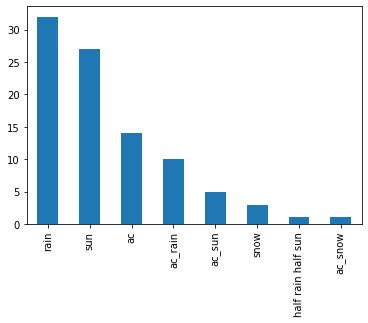

In [21]:
data_xls["specials"].value_counts().plot.bar()

In [22]:
# filling NaN with Unknown class for now.
data_xls["specials"] = data_xls["specials"].fillna("Unknown")

data_xls.tail()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters
383,16.0,3.7,39,24.5,18,Unknown,SP98,0,0,0,0.0
384,16.1,4.3,38,25.0,31,ac,SP98,1,0,0,0.0
385,16.0,3.8,45,25.0,19,Unknown,SP98,0,0,0,0.0
386,15.4,4.6,42,25.0,31,ac,SP98,1,0,0,0.0
387,14.7,5.0,25,25.0,30,ac,SP98,1,0,0,0.0


In [23]:
data_xls["temp_inside"].isna().count()

388

In [24]:
data_xls["temp_inside"].value_counts()

21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
25.0     12
24.5      7
20.5      4
24.0      3
25.5      2
23.5      2
19.0      1
Name: temp_inside, dtype: int64

In [25]:
#now i see that columns ac/rain/sun are encoded already. for the sake of my model i will drop the columns here.

data_xls = data_xls.drop(['ac','rain','sun'], axis=1)

In [26]:
#looking at this data i will convert it to catagorical data

data_xls["temp_inside"] = data_xls["temp_inside"].astype('object')

In [27]:
data_xls.dtypes

distance         float64
consume          float64
speed              int64
temp_inside       object
temp_outside       int64
specials          object
gas_type          object
refill_liters    float64
dtype: object

In [28]:
# based on the data i will fill the NaN with the most ocuring variable

data_xls["temp_inside"] = data_xls["temp_inside"].fillna('21.5')

data_xls

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,refill_liters
0,28.0,5.0,26,21.5,12,Unknown,E10,45.0
1,12.0,4.2,30,21.5,13,Unknown,E10,0.0
2,11.2,5.5,38,21.5,15,Unknown,E10,0.0
3,12.9,3.9,36,21.5,14,Unknown,E10,0.0
4,18.5,4.5,46,21.5,15,Unknown,E10,0.0
...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,Unknown,SP98,0.0
384,16.1,4.3,38,25.0,31,ac,SP98,0.0
385,16.0,3.8,45,25.0,19,Unknown,SP98,0.0
386,15.4,4.6,42,25.0,31,ac,SP98,0.0


In [29]:
#revert back to numerical
data_xls["temp_inside"] = data_xls["temp_inside"].astype("float")

In [30]:
#check the clean dataframe

data_xls.isna().sum()/len(data_xls)

distance         0.0
consume          0.0
speed            0.0
temp_inside      0.0
temp_outside     0.0
specials         0.0
gas_type         0.0
refill_liters    0.0
dtype: float64

In [31]:
# ok now we can get to the analytics part of the assignment

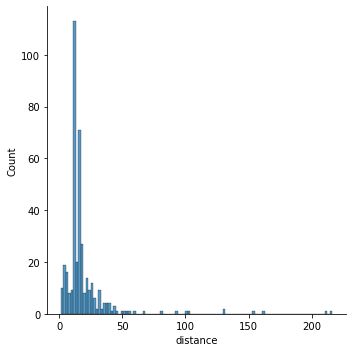

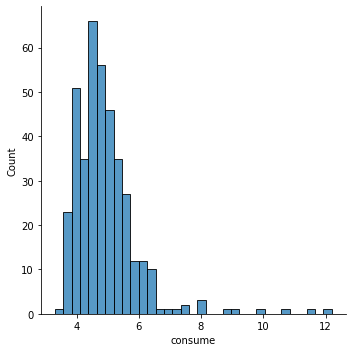

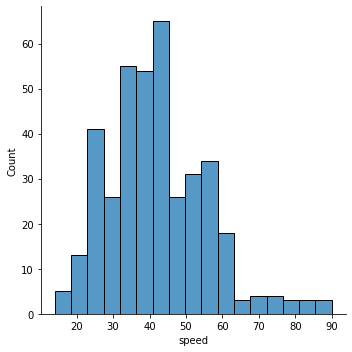

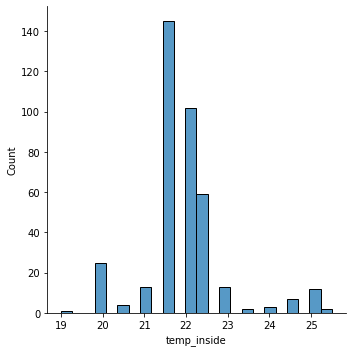

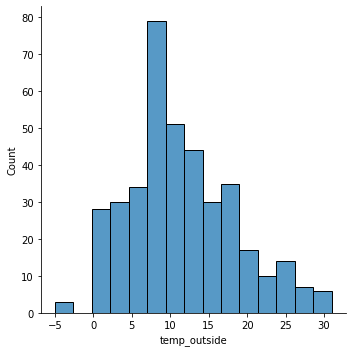

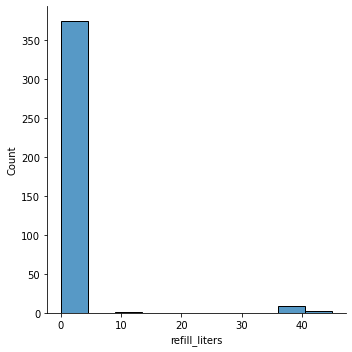

In [32]:
#lets plot our data to get more insight

numerical = data_xls._get_numeric_data()

for column in numerical.columns:
    sns.displot(numerical[column])
    plt.show()

In [33]:
#dta looks good, no outliers or other irrigularities

In [34]:
# based on this data i want to make a model that predicts the fuel consumption.

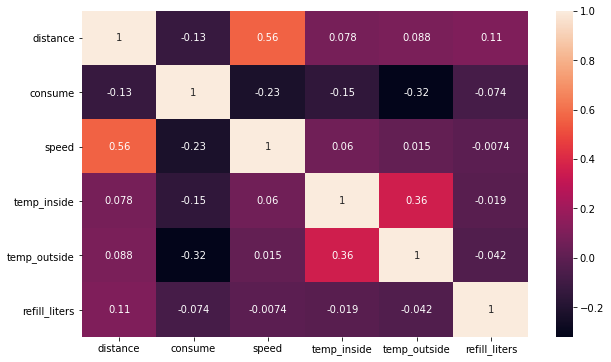

In [35]:
correlations_matrix = numerical.corr()
correlations_matrix

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [36]:
# looks good, lets do some scaling and encoding

In [37]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X= data_xls.drop(["consume"], axis=1)
y= data_xls["consume"]

X.head()

,distance,speed,temp_inside,temp_outside,specials,gas_type,refill_liters
0,28.0,26,21.5,12,Unknown,E10,45.0
1,12.0,30,21.5,13,Unknown,E10,0.0
2,11.2,38,21.5,15,Unknown,E10,0.0
3,12.9,36,21.5,14,Unknown,E10,0.0
4,18.5,46,21.5,15,Unknown,E10,0.0


In [38]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [39]:
#Standardising the numerical data. I chose to use the min max scaler.

from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_num)
x_normalized = MinMaxtransformer.transform(X_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns)
x_normalized.head()

(388, 5)


,distance,speed,temp_inside,temp_outside,refill_liters
0,0.124302,0.157895,0.384615,0.472222,1.0
1,0.049814,0.210526,0.384615,0.500000,0.0
2,0.046089,0.315789,0.384615,0.555556,0.0
3,0.054004,0.289474,0.384615,0.527778,0.0
4,0.080074,0.421053,0.384615,0.555556,0.0


In [42]:
encoder = OneHotEncoder().fit(X_cat)
print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
print(encoded)
cols = [colname for row in encoder.categories_ for colname in row]
cols
onehot_encoded = pd.DataFrame(encoded, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]
cols_to_drop
onehot_encoded = onehot_encoded.drop(cols_to_drop,axis=1)
onehot_encoded.head()

onehot_encoded.shape

[array(['Unknown', 'ac', 'ac_rain', 'ac_snow', 'ac_sun',
       'half rain half sun', 'rain', 'snow', 'sun'], dtype=object), array(['E10', 'SP98'], dtype=object)]
[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]]


(388, 9)

In [57]:
X = pd.concat([x_normalized, onehot_encoded], axis=1)

X.head()

,distance,speed,temp_inside,temp_outside,refill_liters,ac,ac_rain,ac_snow,ac_sun,half rain half sun,rain,snow,sun,SP98
0,0.124302,0.157895,0.384615,0.472222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.049814,0.210526,0.384615,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.046089,0.315789,0.384615,0.555556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.054004,0.289474,0.384615,0.527778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.080074,0.421053,0.384615,0.555556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# time to do a train test split

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(291, 14)
(97, 14)
(291,)
(97,)


In [ ]:
#Fit the model and get the scores

In [59]:
X_train.head()

,distance,speed,temp_inside,temp_outside,refill_liters,ac,ac_rain,ac_snow,ac_sun,half rain half sun,rain,snow,sun,SP98
242,0.036778,0.250000,0.538462,0.361111,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
155,0.164339,0.868421,0.384615,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,0.048883,0.131579,0.384615,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
286,0.167132,0.407895,0.461538,0.694444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
380,0.032588,0.500000,0.846154,0.888889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [60]:
y_train.head()

242    5.7
155    5.2
56     4.9
286    4.0
380    5.0
Name: consume, dtype: float64

In [61]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [62]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.2445416588583944

In [63]:
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.10462203409811621

In [64]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,predictions))

1.3419414770173177

In [66]:
#looking at the score there is some room for improvement